<a href="https://colab.research.google.com/github/Gayathri1298/Brainwave_Matrix_Intern-/blob/main/IPhone14_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn nltk vaderSentiment wordcloud snscrape


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.4 MB/s eta 0:00:00


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud


In [3]:
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
!pip install certifi
!pip install --upgrade certifi


In [7]:
!pip install datasets pandas matplotlib seaborn nltk vaderSentiment wordcloud


In [8]:
from datasets import load_dataset
import pandas as pd

# Load dataset from Hugging Face
dataset = load_dataset("Kkoustubh/iPhone14Tweets")

# Convert to DataFrame
df = dataset['train'].to_pandas()

# Display first few rows
df.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

iphone14tweets.csv:   0%|          | 0.00/50.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/144245 [00:00<?, ? examples/s]

,date_time,username,user_location,user_description,verified,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,source,tweet_text
0,2022-09-08 22:49:29+00:00,TheAppleGang101,None,A new account dedicated to all of the latest l...,False,10,28,0,0,0,"<a href=""http://twitter.com/#!/download/ipad"" ...",iPhone SE 3 gets more expensive in the UK afte...
1,2022-09-08 22:49:27+00:00,TheJessicats,1999,Tweet like nobody’s reading • standup comedian...,False,1642,1444,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@Travon I hope it happens before my iPhone 14 ...
2,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,👨🏽‍💻💳🎫✈️,False,77,87,0,0,0,"<a href=""http://twitter.com/download/android"" ...","Nah iphone 14 upgrade just not it, change my m..."
3,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,Preferring to be the dumbest person in the roo...,False,549,717,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",To the shock of absolutely no one: \n\nApple: ...
4,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,Father of 3. Follower of Christ. Lover of all ...,False,48,153,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@TMobile @TMobileHelp will you be able to orde...


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+", "", tweet)
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stop_words]
    return " ".join(tweet)
df['Cleaned_Tweet'] = df['text'].apply(clean_tweet)

df[['Tweet', 'Cleaned_Tweet']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyError: 'text'

In [10]:
df.columns


Index(['date_time', 'username', 'user_location', 'user_description',
       'verified', 'followers_count', 'following_count', 'tweet_like_count',
       'tweet_retweet_count', 'tweet_reply_count', 'source', 'tweet_text'],
      dtype='object')

In [12]:
df[['text', 'Cleaned_Tweet']].head()


KeyError: "None of [Index(['text', 'Cleaned_Tweet'], dtype='object')] are in the [columns]"

In [13]:
df.columns


Index(['date_time', 'username', 'user_location', 'user_description',
       'verified', 'followers_count', 'following_count', 'tweet_like_count',
       'tweet_retweet_count', 'tweet_reply_count', 'source', 'tweet_text'],
      dtype='object')

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+", "", tweet)
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stop_words]
    return " ".join(tweet)

# ✅ Apply cleaning to the correct column
df['Cleaned_Tweet'] = df['tweet_text'].apply(clean_tweet)

# ✅ Preview result
df[['tweet_text', 'Cleaned_Tweet']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_text,Cleaned_Tweet
0,iPhone SE 3 gets more expensive in the UK afte...,iphone se 3 get expensive uk iphone 14 event
1,@Travon I hope it happens before my iPhone 14 ...,hope happens iphone 14 arrives
2,"Nah iphone 14 upgrade just not it, change my m...",nah iphone 14 upgrade change mind
3,To the shock of absolutely no one: \n\nApple: ...,shock absolutely one apple ready iphone 14 3 p...
4,@TMobile @TMobileHelp will you be able to orde...,able order iphone 14 pro online tomorrow phone


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Cleaned_Tweet'].apply(get_sentiment)
df[['Cleaned_Tweet', 'Sentiment']].head()


,Cleaned_Tweet,Sentiment
0,iphone se 3 get expensive uk iphone 14 event,Neutral
1,hope happens iphone 14 arrives,Positive
2,nah iphone 14 upgrade change mind,Negative
3,shock absolutely one apple ready iphone 14 3 p...,Positive
4,able order iphone 14 pro online tomorrow phone,Neutral


/tmp/ipython-input-3962834231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


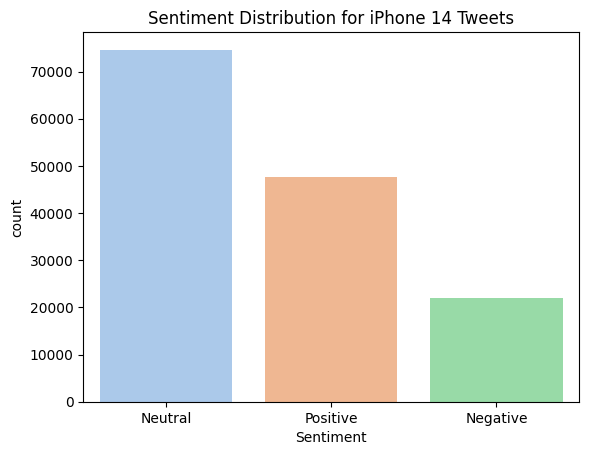

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title("Sentiment Distribution for iPhone 14 Tweets")
plt.show()


In [17]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df['Day'] = df['Date'].dt.date

sentiment_over_time = df.groupby(['Day', 'Sentiment']).size().unstack().fillna(0)
sentiment_over_time.plot(kind='line', figsize=(10,5), title="Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.show()



KeyError: 'Date'

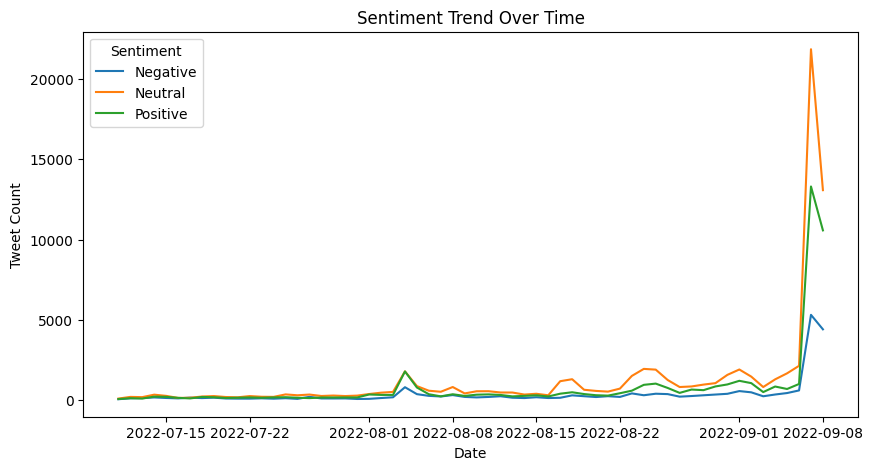

In [18]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df.dropna(subset=['date_time'], inplace=True)
df['Day'] = df['date_time'].dt.date

sentiment_over_time = df.groupby(['Day', 'Sentiment']).size().unstack().fillna(0)
sentiment_over_time.plot(kind='line', figsize=(10,5), title="Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.show()
